# Generating overall figures for report

In [2]:
import os
from results_utils import summarise_cbo_erdos_results, summarise_erdos20_per_iteration
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results")


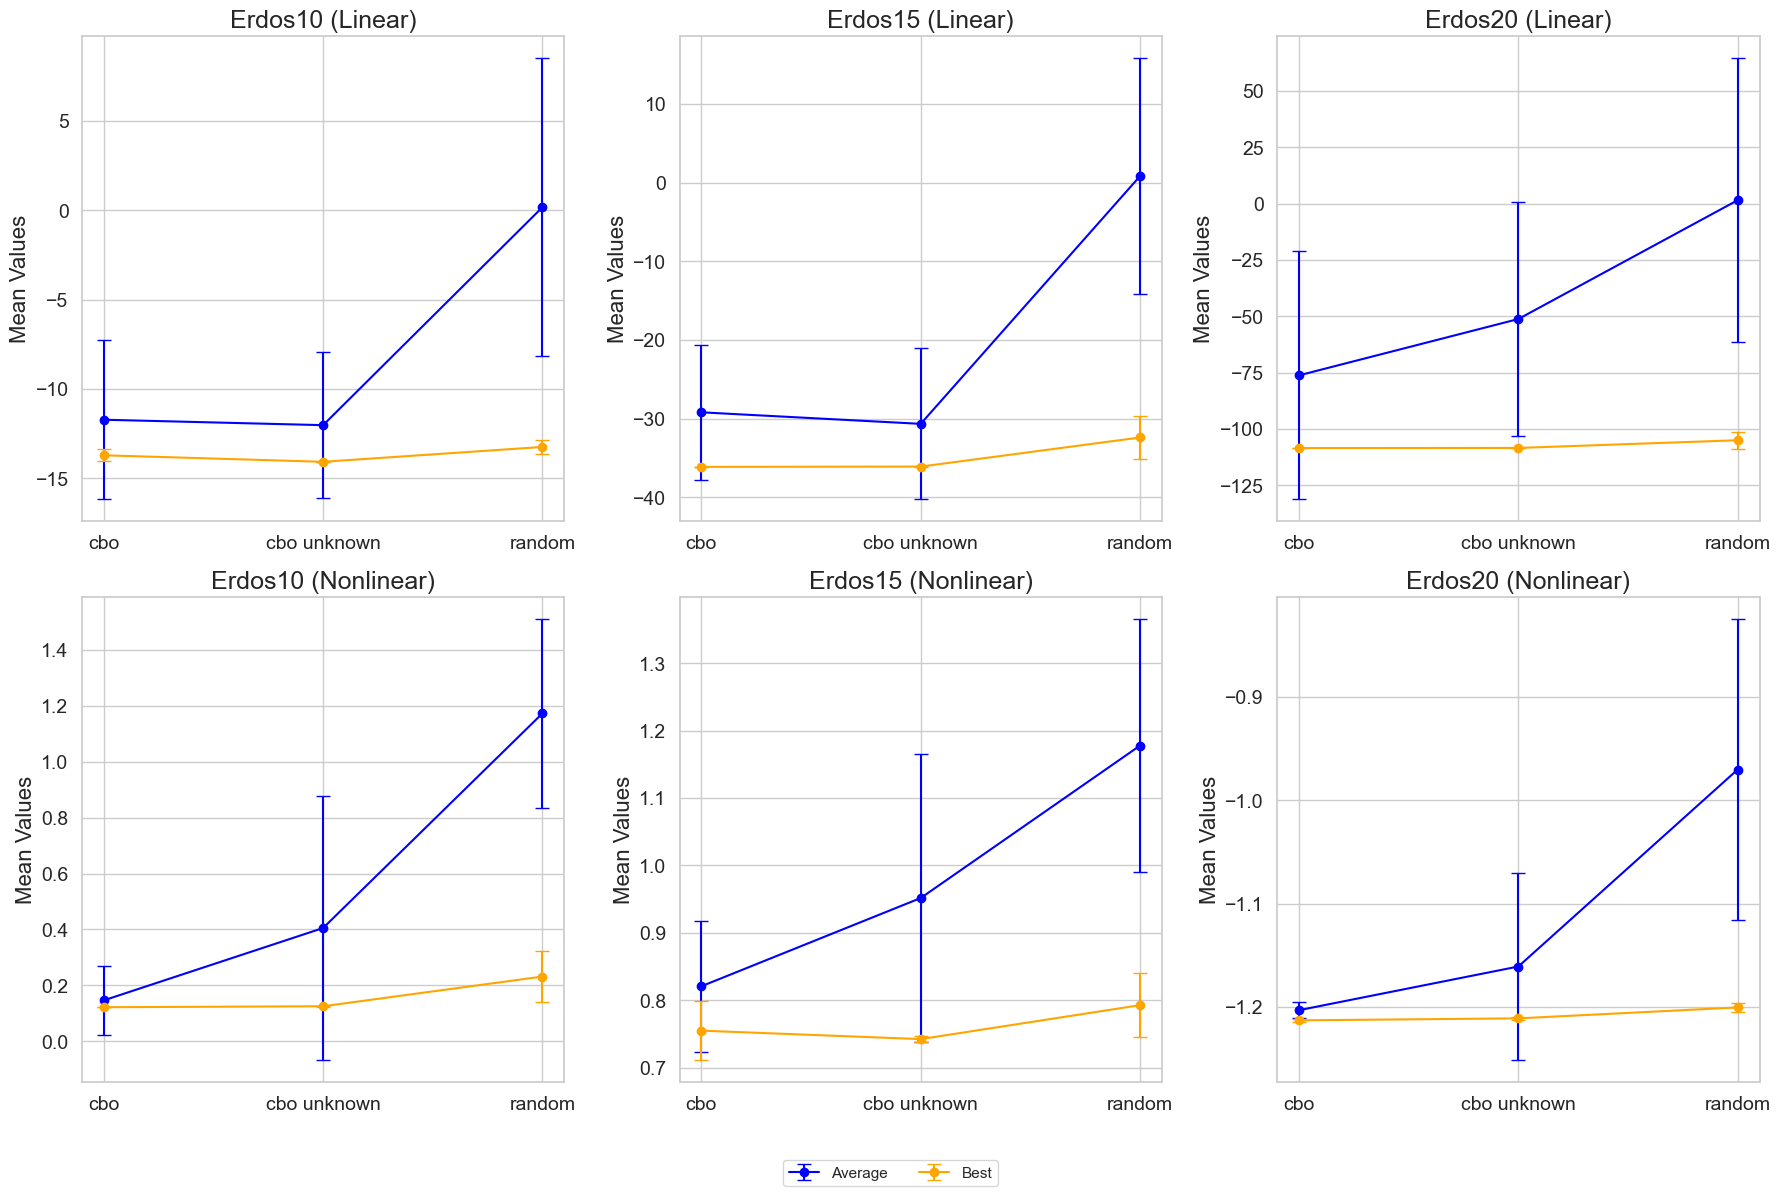

In [4]:
summarise_cbo_erdos_results()

In [5]:
summarise_erdos20_per_iteration()

# Experiment section 2

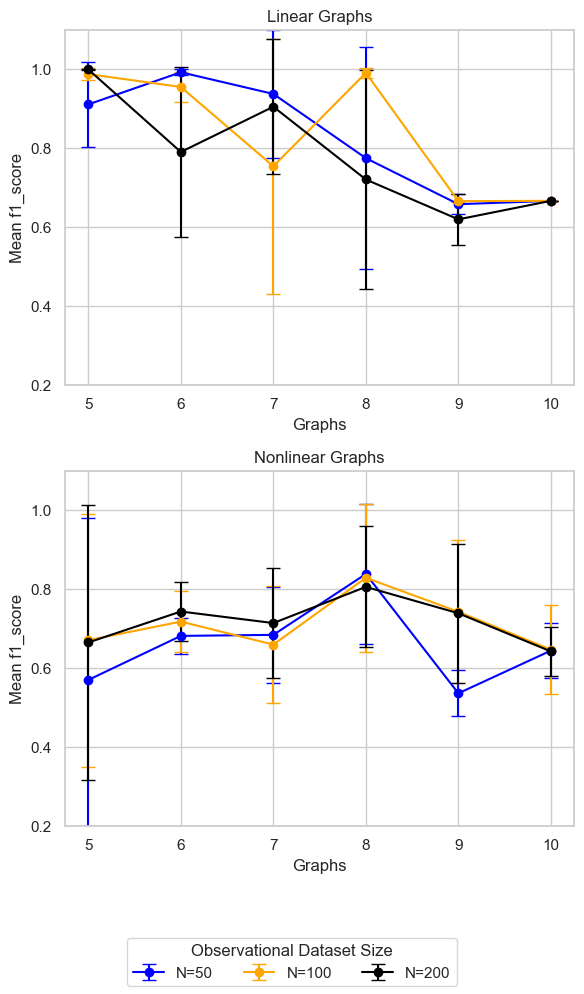

In [2]:
from results_utils import summarise_n_observational
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

summarise_n_observational(statistic="f1_score")

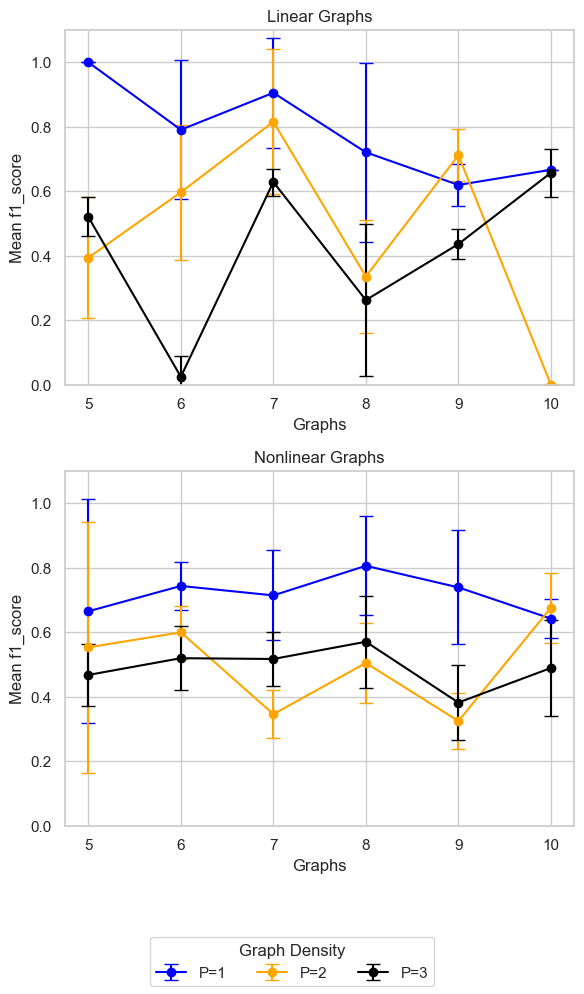

In [1]:

from results_utils import summarise_p_density
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")


summarise_p_density(statistic="f1_score")

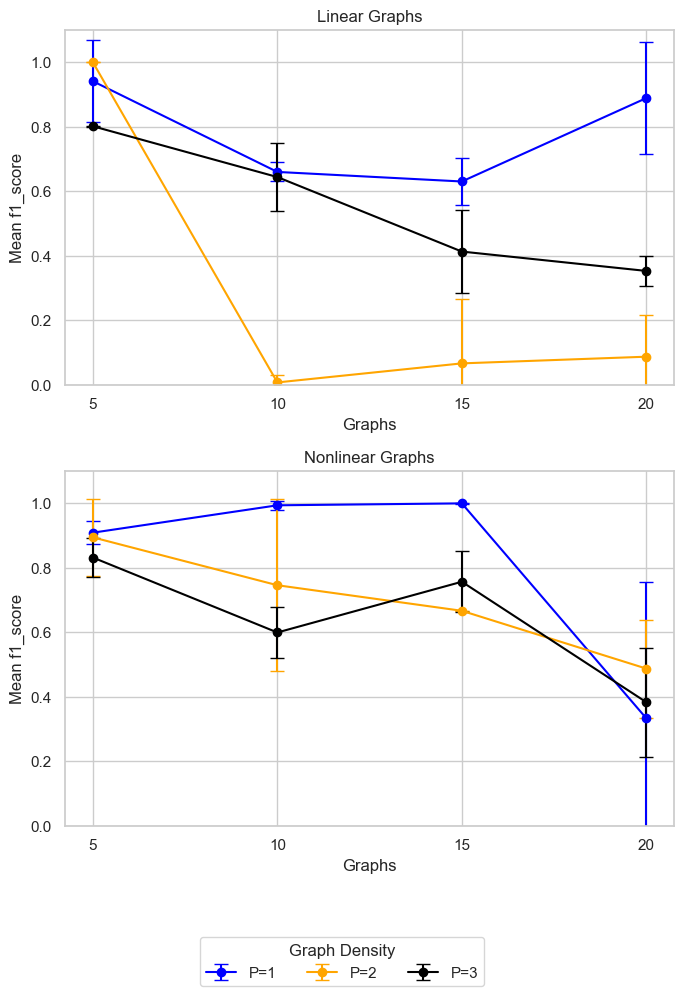

In [3]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from results_utils import load_results
import numpy as np
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

def summarise_dr_density(statistic="accuracy"):
    sns.set_theme(style="whitegrid")
    graphs = [5, 10, 15, 20]
    p_list = [1, 2, 3]
    used_interventions = True
    intervention_string = "_nint" if used_interventions else ""

    # Define colors: blue for P=1, orange for P=2, and black for P=3
    colors = ["blue", "orange", "black"]

    fig, axs = plt.subplots(
        2, 1, figsize=(7, 10)
    )  # Create a figure with 2 subplots side by side

    # Left plot with nonlinear experiment pattern
    for i, p in enumerate(p_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            if p == 1:
                experiment_pattern = (
                    rf".*_nonlinear_200_nint_dr_D_1000_p_{p}_noise_1.0"
                )
            else:
                experiment_pattern = (
                    rf".*_nonlinear_200_nint_dr_D_1000_p_{p}_noise_"
                )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result[statistic][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[1].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    axs[1].set_xlabel("Graphs")
    axs[1].set_ylabel(f"Mean {statistic}")
    axs[1].set_title("Nonlinear Graphs")
    axs[1].set_xticks(graphs)
    # axs[1].legend(title="Graph Density")
    axs[1].grid(True)

    # Right plot with linear experiment pattern
    for i, p in enumerate(p_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            experiment_pattern = (
                rf".*_linear_200_nint_dr_D_1000_p_{p}_noise_"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result[statistic][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[0].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    # Set the same limits for both y-axes
    axs[0].set_ylim(0, 1.1)
    axs[1].set_ylim(0, 1.1)
    axs[0].set_xlabel("Graphs")
    axs[0].set_ylabel(f"Mean {statistic}")
    axs[0].set_title("Linear Graphs")
    axs[0].set_xticks(graphs)
    # axs[0].legend(title="Graph Density")
    axs[0].grid(True)

    # Add a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(p_list),
        title="Graph Density",
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust spacing to prevent overlap
    plt.savefig(f"graph_dr_density_results_{statistic}")
    plt.show()

summarise_dr_density(statistic="f1_score")

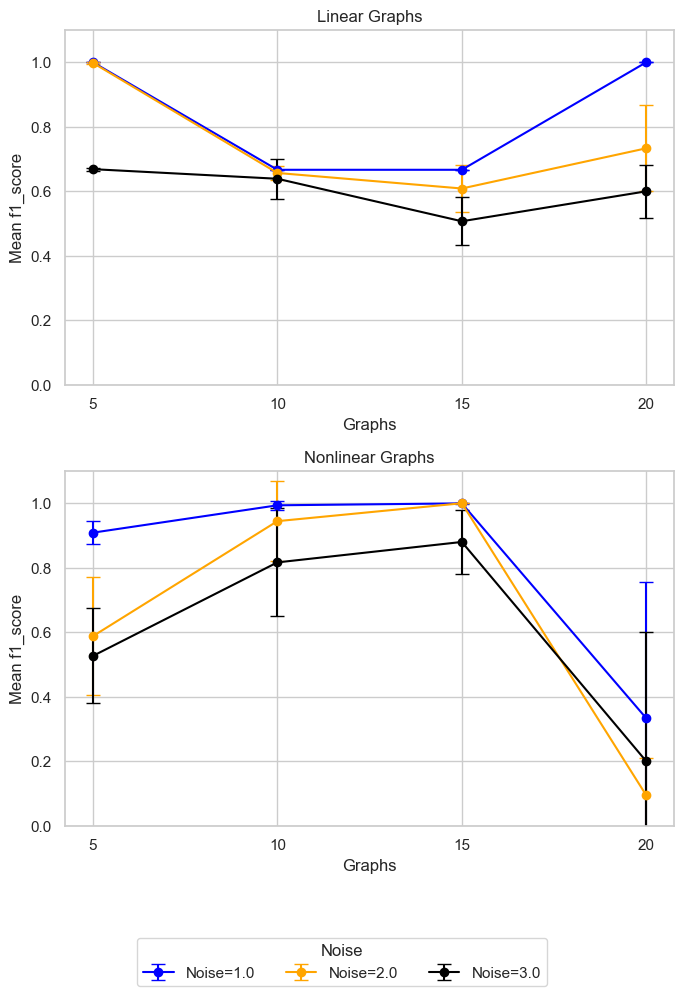

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from results_utils import load_results
import numpy as np
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

def summarise_noise_dr(statistic="accuracy"):
    sns.set_theme(style="whitegrid")
    graphs = [5, 10, 15, 20]
    sigma_list = [1.0, 2.0, 3.0]
    used_interventions = True
    intervention_string = "_nint" if used_interventions else ""

    # Define colors: blue for P=1, orange for P=2, and black for P=3
    colors = ["blue", "orange", "black", "red"]

    fig, axs = plt.subplots(
        2, 1, figsize=(7, 10)
    )  # Create a figure with 2 subplots side by side

    # Left plot with nonlinear experiment pattern
    for i, sigma in enumerate(sigma_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            experiment_pattern = (
                rf".*_nonlinear_200_nint_dr_D_1000_p_1_noise_{sigma}"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result[statistic][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[1].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"Noise={sigma}",
            marker="o",
            color=colors[i],
        )

    axs[1].set_xlabel("Graphs")
    axs[1].set_ylabel(f"Mean {statistic}")
    axs[1].set_title("Nonlinear Graphs")
    axs[1].set_xticks(graphs)
    # axs[1].legend(title="Graph Density")
    axs[1].grid(True)

    # Right plot with linear experiment pattern
    for i, sigma in enumerate(sigma_list):
        f1_means = []
        f1_stds = []

        for graph in graphs:
            experiment_pattern = (
                rf".*_linear_200_nint_dr_D_1000_p_1_noise_{sigma}"
            )
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_f1_scores = [result[statistic][-1] for result in all_results]
            f1_means.append(np.mean(final_f1_scores))
            f1_stds.append(np.std(final_f1_scores))

        axs[0].errorbar(
            graphs,
            f1_means,
            yerr=f1_stds,
            capsize=5,
            label=f"Noise={sigma}",
            marker="o",
            color=colors[i],
        )

    # Set the same limits for both y-axes
    axs[0].set_ylim(0, 1.1)
    axs[1].set_ylim(0, 1.1)
    axs[0].set_xlabel("Graphs")
    axs[0].set_ylabel(f"Mean {statistic}")
    axs[0].set_title("Linear Graphs")
    axs[0].set_xticks(graphs)
    # axs[0].legend(title="Graph Density")
    axs[0].grid(True)

    # Add a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        ncol=len(sigma_list),
        title="Noise",
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust spacing to prevent overlap
    plt.savefig(f"graph_noise_dr_{statistic}")
    plt.show()

summarise_noise_dr(statistic="f1_score")

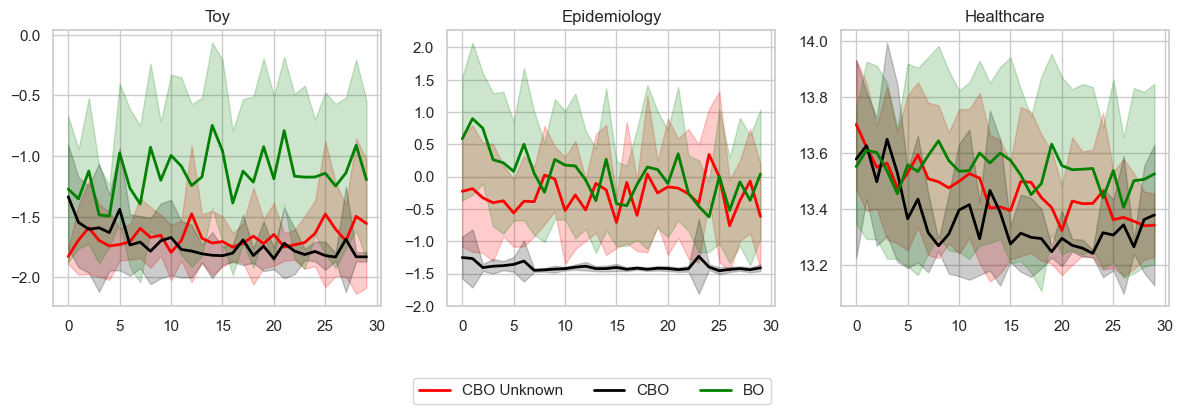

In [1]:
from results_utils import load_results, aggregate_results
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results/")

def plot_toy_examples():
    sns.set_theme(style="whitegrid")
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Plot for the second figure (Best_Y)
    ax = axs[2]
    experiment_pattern = rf".*_cbo_dr_EI_results_200_2"
    all_results = load_results(base_path=f"Graph6Unknown/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Red")
    ax.plot(x_values, mean, label="CBO Unknown", color="Red", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_0"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[1:31]
    std = std[1:31]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Black")
    ax.plot(x_values, mean, label="CBO", color="Black", linewidth=2)

    experiment_pattern = rf".*_bo_results_new_200_2_"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="BO", color="Green", linewidth=2)
    ax.set_title("Healthcare")

    # ax.legend()

    # Plot for the second figure (Best_Y)
    ax = axs[1]
    experiment_pattern = rf".*_cbo_dr_EI_results_200_2"
    all_results = load_results(base_path=f"Graph5Unknown/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Red")
    ax.plot(x_values, mean, label="CBO Unknown", color="Red", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_0"
    all_results = load_results(base_path=f"Graph5/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[1:31]
    std = std[1:31]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Black")
    ax.plot(x_values, mean, label="CBO", color="Black", linewidth=2)

    experiment_pattern = rf".*_bo_results_new_200_2_"
    all_results = load_results(base_path=f"Graph5Wrong/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="BO", color="Green", linewidth=2)
    ax.set_title("Epidemiology")


    # ax.legend()

    # Plot for the second figure (Best_Y)
    ax = axs[0]
    experiment_pattern = rf".*_cbo_dr_EI_results_200_2"
    all_results = load_results(base_path=f"ToyGraphUnknown/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Red")
    ax.plot(x_values, mean, label="CBO Unknown", color="Red", linewidth=2)

    experiment_pattern = rf".*_cbo_results_200_2_graph_0"
    all_results = load_results(base_path=f"ToyGraph/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[1:31]
    std = std[1:31]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Black")
    ax.plot(x_values, mean, label="CBO", color="Black", linewidth=2)

    experiment_pattern = rf".*_bo_results_new_200_2_"
    all_results = load_results(base_path=f"ToyGraph/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Per_trial_Y")
    mean = mean[:30]
    std = std[:30]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="BO", color="Green", linewidth=2)
    ax.set_title("Toy")

    experiment_pattern = rf".*_cbo_results_200_2_graph_4"
    all_results = load_results(base_path=f"Graph6/", regex=experiment_pattern)
    mean, std = aggregate_results(all_results, "Best_Y")
    mean = mean[1:31]
    std = std[1:31]
    x_values = range(len(mean))

    ax.fill_between(x_values, mean - std, mean + std, alpha=0.2, color="Green")
    ax.plot(x_values, mean, label="CBO Wrong", color="Green", linewidth=2)
    ax.set_title('Best Y')
    ax.legend()

    # Adjust the layout to ensure the plots and legend fit well
    # Create a combined legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.05), ncol=3)
    # Adjust layout to make space for the legend
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # Show the combined plot
    plt.savefig("toy_all_per_trial_graph", bbox_inches='tight')
    plt.show()


plot_toy_examples()

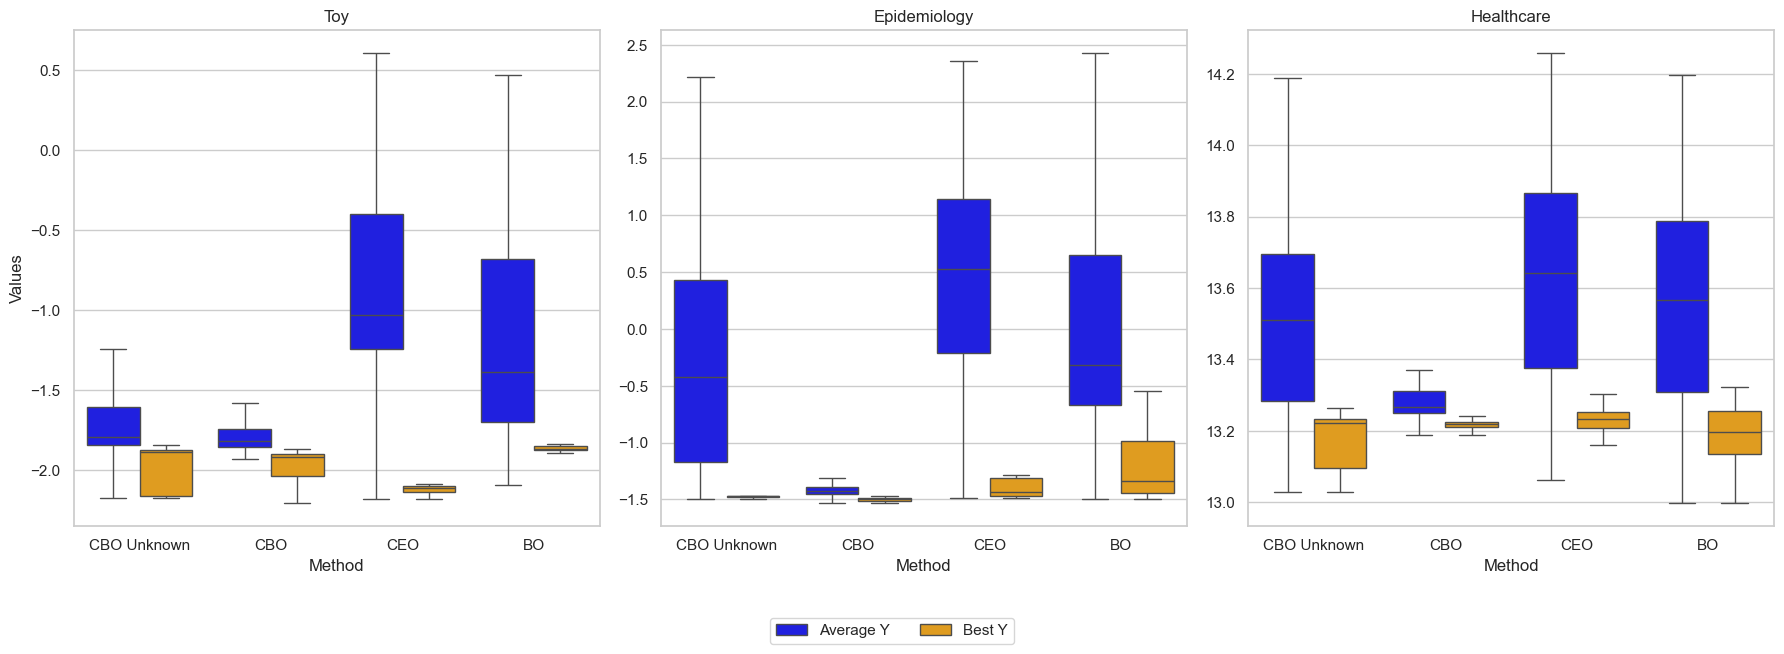

In [1]:
import os
os.chdir("/vol/bitbucket/jd123/causal_bayes_opt/results")
from results_utils import summarise_cbo_toy_results, summarize_cbo_toy_results_with_boxplots

summarize_cbo_toy_results_with_boxplots()

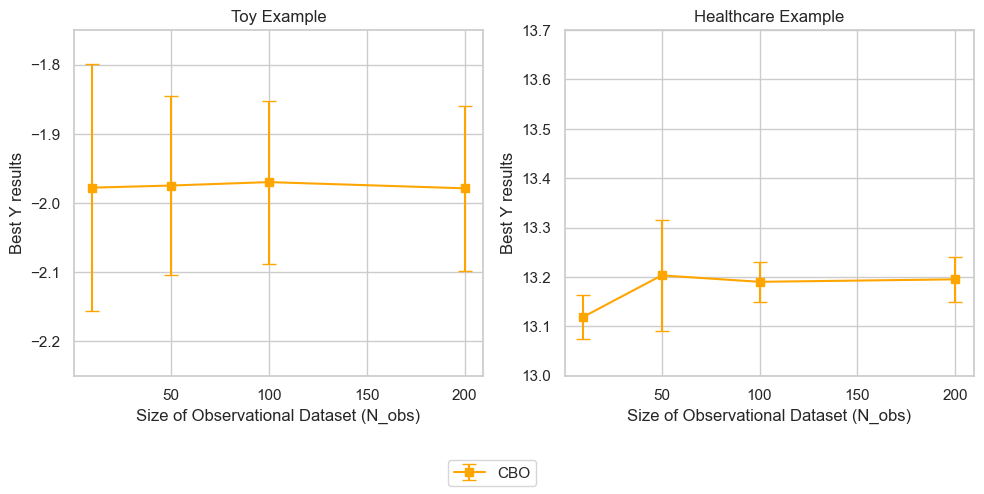

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data from the tables

def plot_cbo_vs_bo_obs_toy_and_healthcare():
    sns.set_theme(style="whitegrid")
    n_obs = [10, 50, 100, 200]

    # Data for CBO algorithm
    cbo_toy = [-1.978, -1.975, -1.970, -1.979]
    cbo_toy_err = [0.179, 0.129, 0.118, 0.119]
    cbo_healthcare = [13.119, 13.203, 13.190, 13.195]
    cbo_healthcare_err = [0.044, 0.112, 0.041, 0.046]

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

    # Plotting for Toy example
    ax[0].errorbar(n_obs, cbo_toy, yerr=cbo_toy_err, label='CBO', fmt='s-', capsize=5, color="Orange")
    ax[0].set_xlabel('Size of Observational Dataset (N_obs)')
    ax[0].set_ylabel('Best Y results')
    ax[0].set_title('Toy Example')
    ax[0].set_ylim(-2.25, -1.75)  # Adjust y-axis limits for more space

    # Plotting for Healthcare example
    ax[1].errorbar(n_obs, cbo_healthcare, yerr=cbo_healthcare_err, label='CBO', fmt='s-', capsize=5, color="Orange")
    ax[1].set_xlabel('Size of Observational Dataset (N_obs)')
    ax[1].set_ylabel('Best Y results')
    ax[1].set_title('Healthcare Example')
    ax[1].set_ylim(13.0, 13.7)  # Adjust y-axis limits for more space

    # Combine legends and place at the bottom
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2)

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legend
    plt.savefig('cbo_vs_bo_obs.png', dpi=300, bbox_inches='tight')  # Save the figure
    plt.show()

# Call the function to plot and save
plot_cbo_vs_bo_obs_toy_and_healthcare()


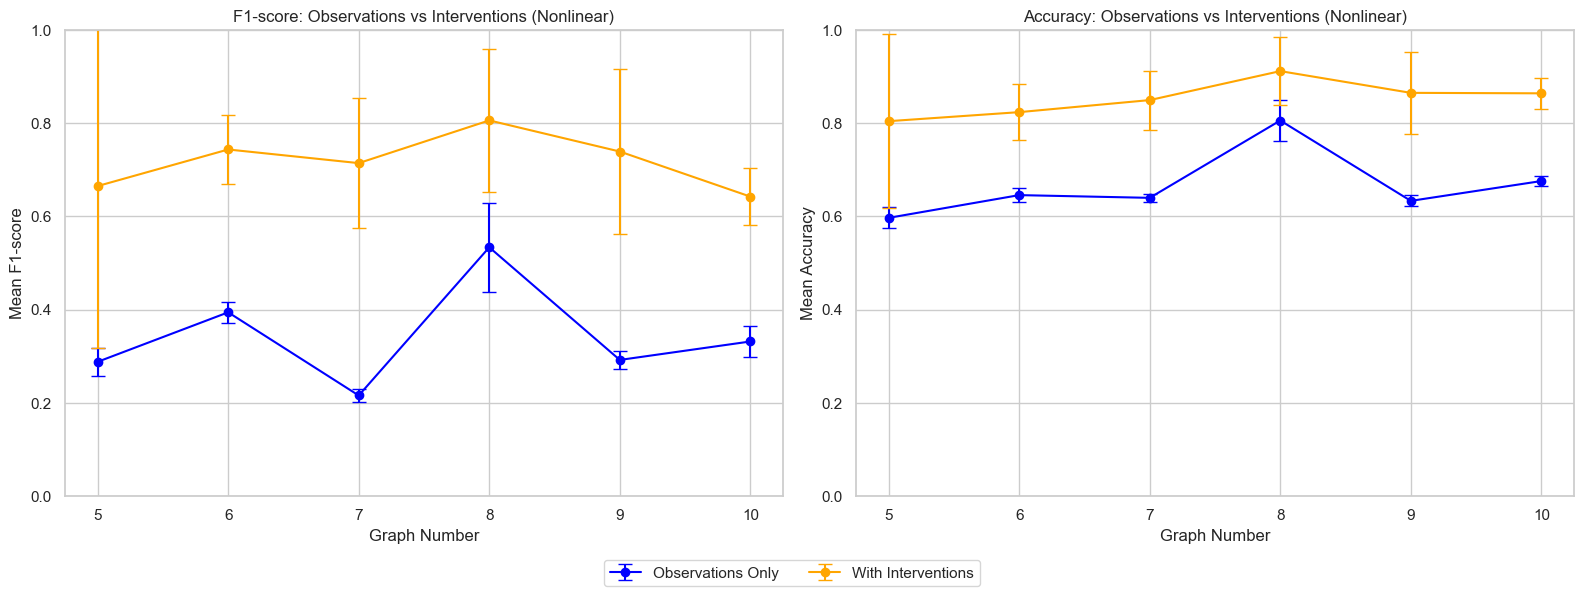

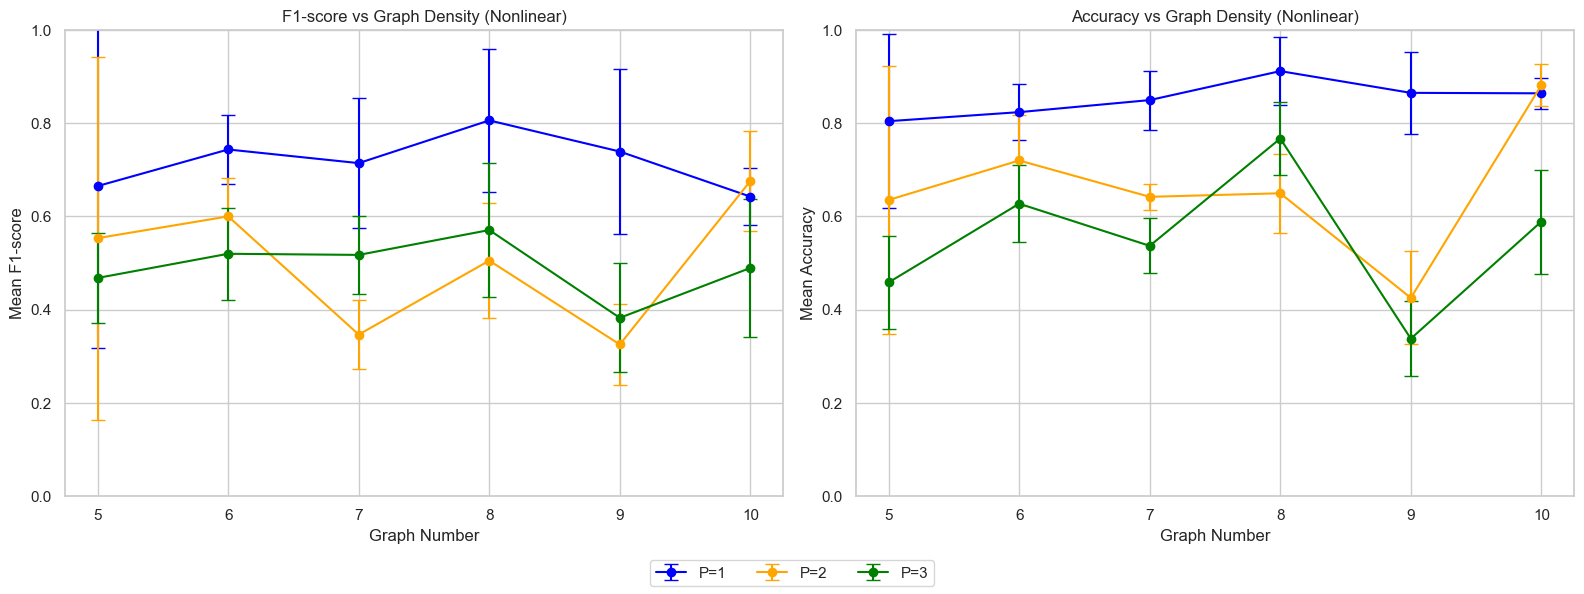

In [5]:
import os
import pickle
import re
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Function to load all results of a given type
def load_results(base_path, regex):
    results = []
    for filename in os.listdir(base_path):
        if bool(re.match(regex, filename)):
            with open(os.path.join(base_path, filename), "rb") as file:
                results.append(pickle.load(file))
    return results

# Function to generate Observations vs Interventions plots
def plot_obs_vs_int():
    sns.set_theme(style="whitegrid")
    graphs = [5, 6, 7, 8, 9, 10]
    used_interventions_list = [False, True]  # Observations only and with interventions
    n_obs = 200
    p = 1  # Assuming p=1 for simplicity
    nonlinear = True

    colors = ["blue", "orange"]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot F1-score: Observations vs Interventions
    ax = axs[0]
    statistic = "f1_score"
    for i, used_interventions in enumerate(used_interventions_list):
        means = []
        stds = []
        intervention_string = "_nint" if used_interventions else ""
        for graph in graphs:
            experiment_pattern = rf".*_nonlinear_{n_obs}{intervention_string}_D_1000_p_{p}_noise_.*"
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_scores = [result[statistic][-1] for result in all_results if statistic in result]
            if final_scores:
                means.append(np.mean(final_scores))
                stds.append(np.std(final_scores))
            else:
                means.append(np.nan)
                stds.append(np.nan)

        ax.errorbar(
            graphs,
            means,
            yerr=stds,
            capsize=5,
            label=f"{'With Interventions' if used_interventions else 'Observations Only'}",
            marker="o",
            color=colors[i],
        )

    ax.set_xlabel("Graph Number")
    ax.set_ylabel("Mean F1-score")
    ax.set_title("F1-score: Observations vs Interventions (Nonlinear)")
    ax.set_xticks(graphs)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

    # Plot Accuracy: Observations vs Interventions
    ax = axs[1]
    statistic = "accuracy"
    for i, used_interventions in enumerate(used_interventions_list):
        means = []
        stds = []
        intervention_string = "_nint" if used_interventions else ""
        for graph in graphs:
            experiment_pattern = rf".*_nonlinear_{n_obs}{intervention_string}_D_1000_p_{p}_noise_.*"
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_scores = [result[statistic][-1] for result in all_results if statistic in result]
            if final_scores:
                means.append(np.mean(final_scores))
                stds.append(np.std(final_scores))
            else:
                means.append(np.nan)
                stds.append(np.nan)

        ax.errorbar(
            graphs,
            means,
            yerr=stds,
            capsize=5,
            label=f"{'With Interventions' if used_interventions else 'Observations Only'}",
            marker="o",
            color=colors[i],
        )

    ax.set_xlabel("Graph Number")
    ax.set_ylabel("Mean Accuracy")
    ax.set_title("Accuracy: Observations vs Interventions (Nonlinear)")
    ax.set_xticks(graphs)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

    # Place a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2)
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for the legend

    plt.savefig("nonlinear_obs_vs_int_plots.png")
    plt.show()

# Function to generate Graph Density plots
def plot_density_plots():
    sns.set_theme(style="whitegrid")
    graphs = [5, 6, 7, 8, 9, 10]
    p_list = [1, 2, 3]  # Different densities
    used_interventions = True  # Assuming interventions are used
    n_obs = 200
    nonlinear = True

    colors = ["blue", "orange", "green"]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot F1-score vs Graph Density
    ax = axs[0]
    statistic = "f1_score"
    for i, p in enumerate(p_list):
        means = []
        stds = []
        for graph in graphs:
            intervention_string = "_nint" if used_interventions else ""
            experiment_pattern = rf".*_nonlinear_{n_obs}{intervention_string}_D_1000_p_{p}_noise_.*"
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_scores = [result[statistic][-1] for result in all_results if statistic in result]
            if final_scores:
                means.append(np.mean(final_scores))
                stds.append(np.std(final_scores))
            else:
                means.append(np.nan)
                stds.append(np.nan)

        ax.errorbar(
            graphs,
            means,
            yerr=stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    ax.set_xlabel("Graph Number")
    ax.set_ylabel("Mean F1-score")
    ax.set_title("F1-score vs Graph Density (Nonlinear)")
    ax.set_xticks(graphs)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

    # Plot Accuracy vs Graph Density
    ax = axs[1]
    statistic = "accuracy"
    for i, p in enumerate(p_list):
        means = []
        stds = []
        for graph in graphs:
            intervention_string = "_nint" if used_interventions else ""
            experiment_pattern = rf".*_nonlinear_{n_obs}{intervention_string}_D_1000_p_{p}_noise_.*"
            all_results = load_results(
                base_path=f"posterior/Erdos{graph}/", regex=experiment_pattern
            )
            final_scores = [result[statistic][-1] for result in all_results if statistic in result]
            if final_scores:
                means.append(np.mean(final_scores))
                stds.append(np.std(final_scores))
            else:
                means.append(np.nan)
                stds.append(np.nan)

        ax.errorbar(
            graphs,
            means,
            yerr=stds,
            capsize=5,
            label=f"P={p}",
            marker="o",
            color=colors[i],
        )

    ax.set_xlabel("Graph Number")
    ax.set_ylabel("Mean Accuracy")
    ax.set_title("Accuracy vs Graph Density (Nonlinear)")
    ax.set_xticks(graphs)
    ax.grid(True)
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

    # Place a single legend at the bottom
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3)
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for the legend

    plt.savefig("nonlinear_density_plots.png")
    plt.show()

# Call the plotting functions
plot_obs_vs_int()
plot_density_plots()
